<a href="https://colab.research.google.com/github/Manojkumar310897/INSAID_assignment/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**

This case requires trainees to develop a model for predicting fraudulent transactions for a
financial company and use insights from the model to develop an actionable plan. Data for the
case is available in CSV format having 6362620 rows and 10 columns.
Candidates can use whatever method they wish to develop their machine learning model.
Following usual model development procedures, the model would be estimated on the
calibration data and tested on the validation data. This case requires both statistical analysis and
creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the
results of your machine learning model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Fraud.csv')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.shape

(6362620, 11)

In [7]:
df.size

69988820

# **DATA CLEANING**

**1.Checking for null values**

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**2.Spelling correction**

<Axes: >

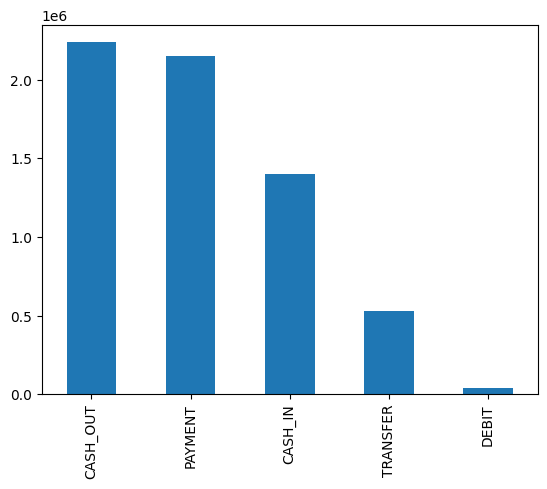

In [9]:
df['type'].value_counts().plot(kind="bar")

<Axes: >

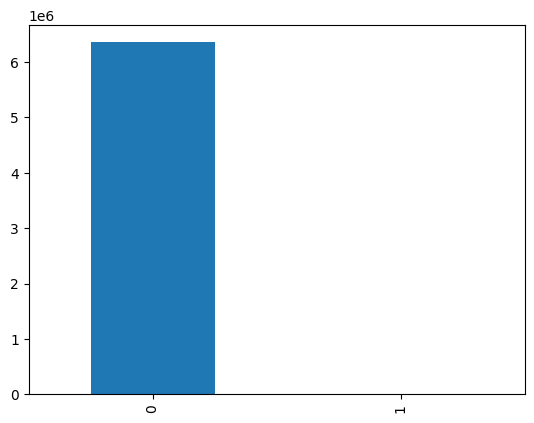

In [10]:
df['isFraud'].value_counts().plot(kind="bar")

In [11]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


**We can clearly see that the target varibale is imbalanced.s Percentage of Legit transactions= 99.87 % and Percentage of Fraud transactions= 0.13 %.** 


<Axes: >

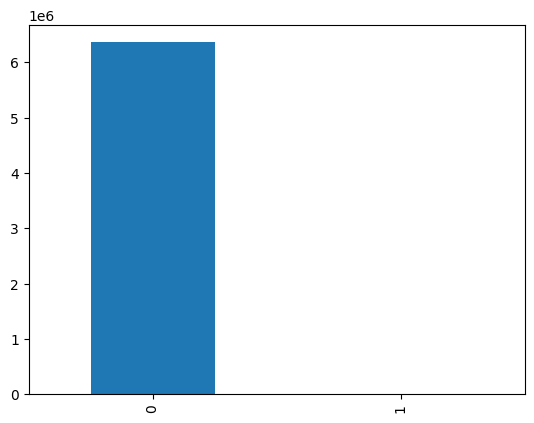

In [12]:
df['isFlaggedFraud'].value_counts().plot(kind="bar")

3.**Checking for data Types**

In [13]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

**4.Checking for Duplicates**

In [14]:
df.duplicated().sum()

0

**5.Checking for Outliers**

In [15]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<Axes: >

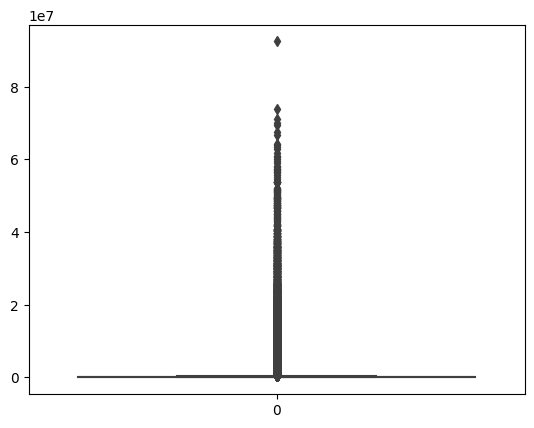

In [16]:
sns.boxplot(df['amount'])

<Axes: >

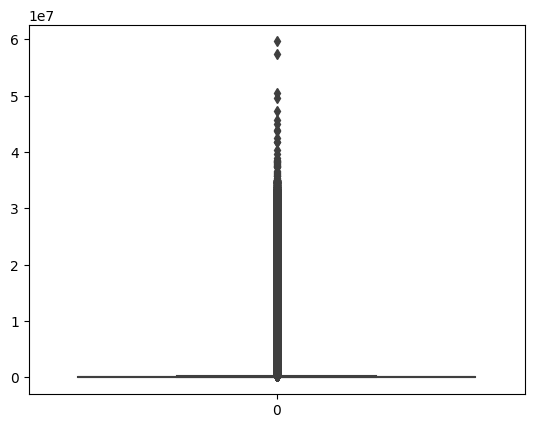

In [17]:
sns.boxplot(df['oldbalanceOrg'])

<Axes: >

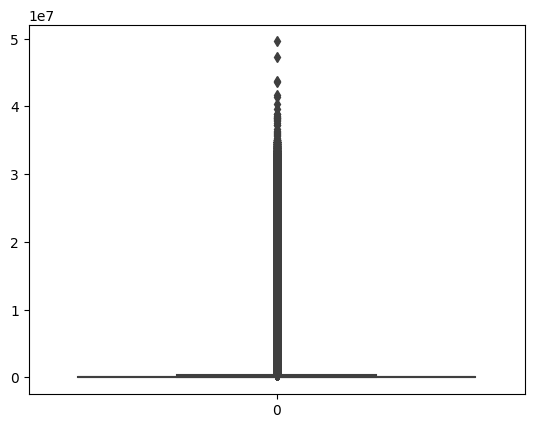

In [18]:
sns.boxplot(df['newbalanceOrig'])

There are some outliers in the data.We are not removing the outliers,as it may impact the loss of data.

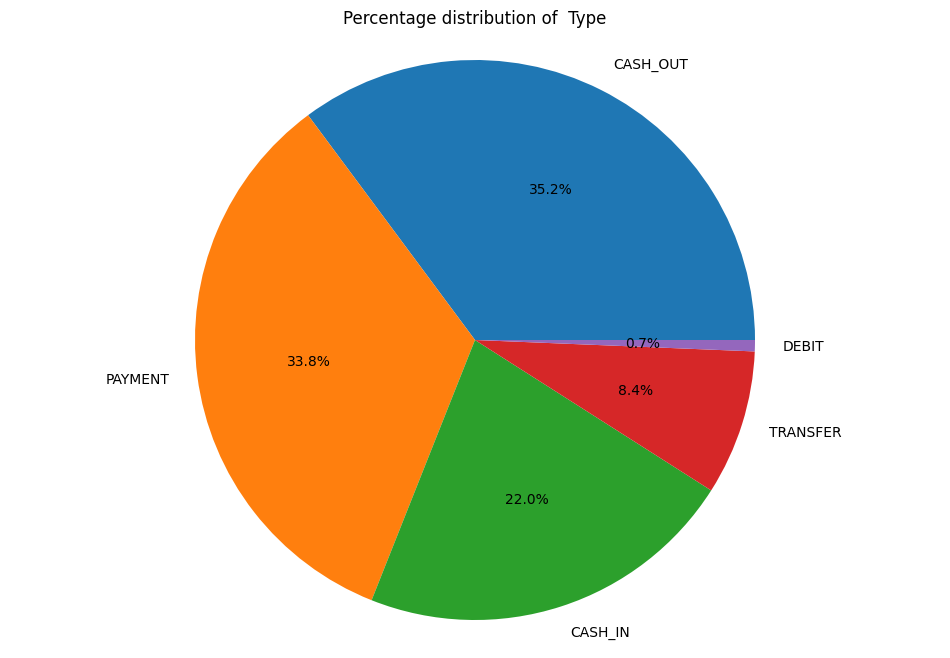

In [19]:
plt.figure(figsize=(12,8))
df_source = df.type.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['type'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percentage distribution of  Type')
plt.axis('equal')
plt.show() 

Out of all the Transaction type Payment and Cash out are highly distributed.

# **TARGET VS FEATURE PLOT**

Text(0.5, 1.0, 'Type vs Fraud')

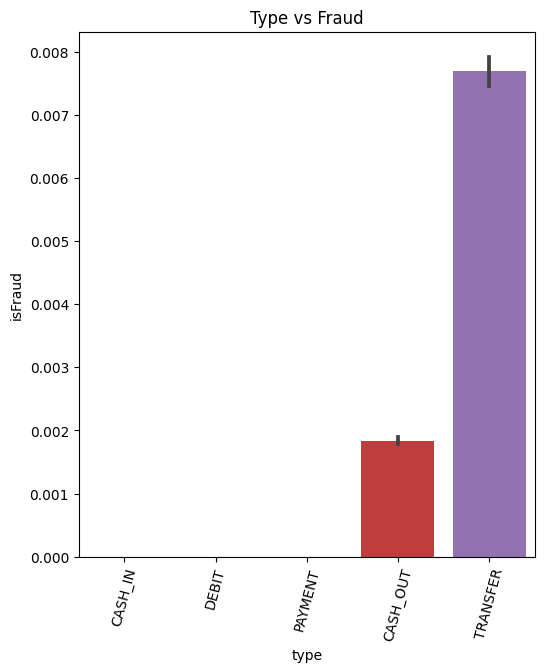

In [20]:
plt.figure(figsize=(20,15))

plt.subplot(231)
sns.barplot(x='type',y='isFraud',data=df,order=df.groupby('type')['isFraud'].mean().reset_index().sort_values('isFraud')['type'])
plt.xticks(rotation=75)
plt.title('Type vs Fraud')

# We can clearly see that during Transfer and Cash out the chances of fraud are high.

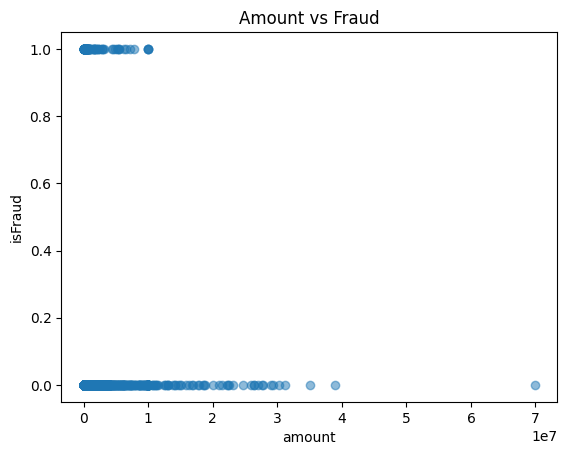

In [21]:
sample_size = 100000  # Adjust this value to change the sample size
df_sample = df.sample(n=sample_size)

# Extract the feature and target columns from the DataFrame
feature_col = 'amount'  # Replace with the actual name of your feature column
target_col = 'isFraud'    # Replace with the actual name of your target column
feature_values = df_sample[feature_col]
target_values = df_sample[target_col]

# Plot the feature vs target
plt.scatter(feature_values, target_values, alpha=0.5)
plt.xlabel('amount')
plt.ylabel('isFraud')
plt.title('Amount vs Fraud')
plt.show()

According to amount vs fraud plot,we can cleary see that when the amount transaction is low,chances of fraud are high.

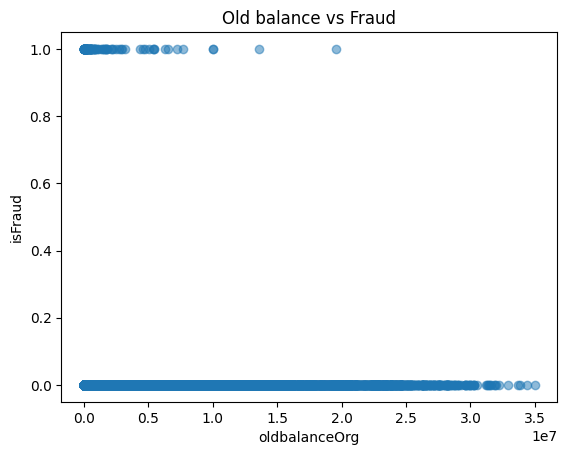

In [22]:
# Extract the feature and target columns from the DataFrame
feature_col = 'oldbalanceOrg'  # Replace with the actual name of your feature column
target_col = 'isFraud'    # Replace with the actual name of your target column
feature_values = df_sample[feature_col]
target_values = df_sample[target_col]

# Plot the feature vs target
plt.scatter(feature_values, target_values, alpha=0.5)
plt.xlabel('oldbalanceOrg')
plt.ylabel('isFraud')
plt.title('Old balance vs Fraud')
plt.show()

According to  vs old balance vs Fraud plot,we can cleary see that when the old balance transaction is low,chances of fraud are high.

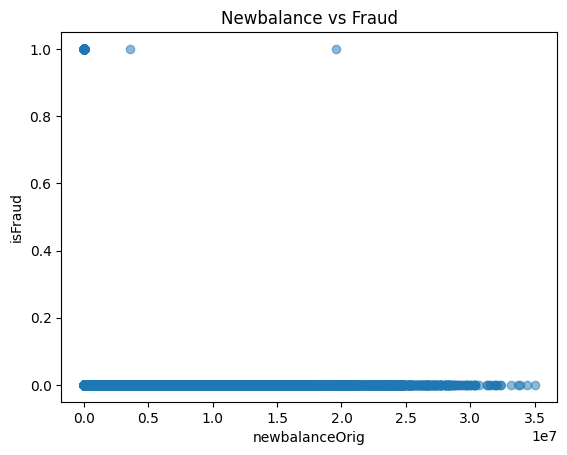

In [23]:
# Extract the feature and target columns from the DataFrame
feature_col = 'newbalanceOrig'  # Replace with the actual name of your feature column
target_col = 'isFraud'    # Replace with the actual name of your target column
feature_values = df_sample[feature_col]
target_values = df_sample[target_col]

# Plot the feature vs target
plt.scatter(feature_values, target_values, alpha=0.5)
plt.xlabel('newbalanceOrig')
plt.ylabel('isFraud')
plt.title('Newbalance vs Fraud')
plt.show()

We cant see any relation between  newbalance vs fraud plot

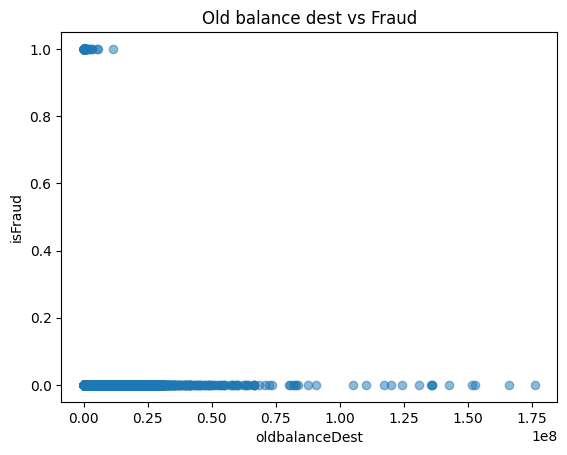

In [24]:
# Extract the feature and target columns from the DataFrame
feature_col = 'oldbalanceDest'  # Replace with the actual name of your feature column
target_col = 'isFraud'    # Replace with the actual name of your target column
feature_values = df_sample[feature_col]
target_values = df_sample[target_col]

# Plot the feature vs target
plt.scatter(feature_values, target_values, alpha=0.5)
plt.xlabel('oldbalanceDest')
plt.ylabel('isFraud')
plt.title('Old balance dest vs Fraud')
plt.show()

We cant see any relation between  newbalance vs fraud plot

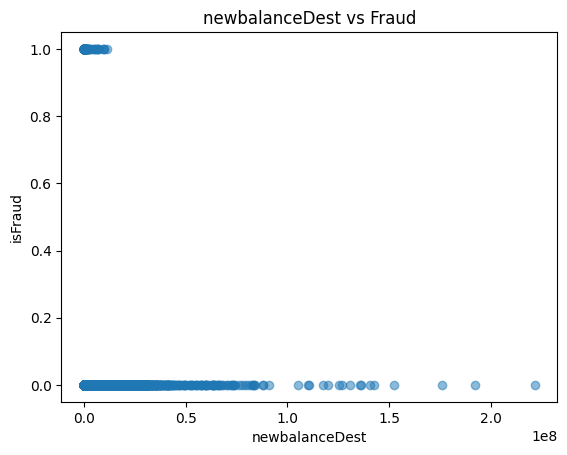

In [25]:
# Extract the feature and target columns from the DataFrame
feature_col = 'newbalanceDest'  # Replace with the actual name of your feature column
target_col = 'isFraud'    # Replace with the actual name of your target column
feature_values = df_sample[feature_col]
target_values = df_sample[target_col]

# Plot the feature vs target
plt.scatter(feature_values, target_values, alpha=0.5)
plt.xlabel('newbalanceDest')
plt.ylabel('isFraud')
plt.title('newbalanceDest vs Fraud')
plt.show()

According to new balance vs fraud plot,we cant clearly say that when the newbalance  after transaction is low,chances of fraud are high.

# **ENCODING**

In [26]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = {}
for i in df.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    df[i] = encoder[i].fit_transform(df[i])

In [28]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


**Checking for Multicollinearity**

<Axes: >

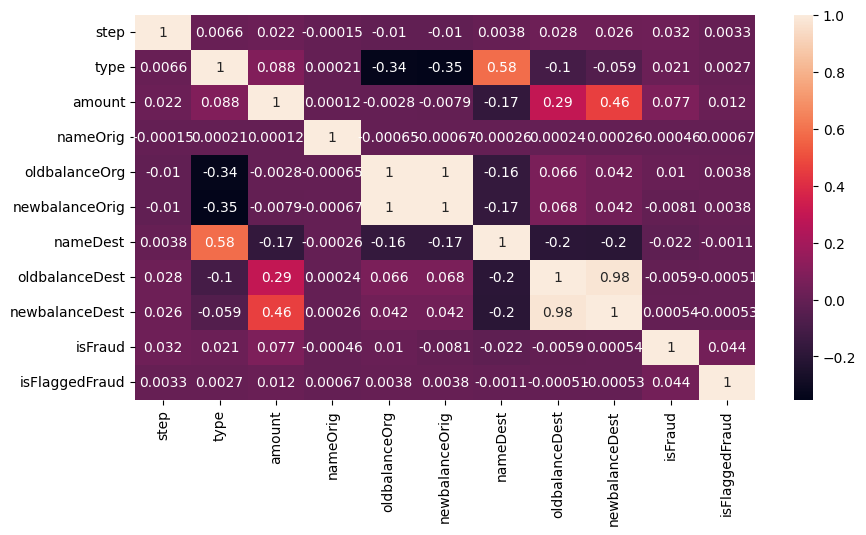

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


**We can see that oldbalanceOrg and newbalanceOrig are thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

In [31]:
df['Actual_amount_orig'] = df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df['Actual_amount_dest'] = df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df['TransactionPath'] = df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
df = df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<Axes: >

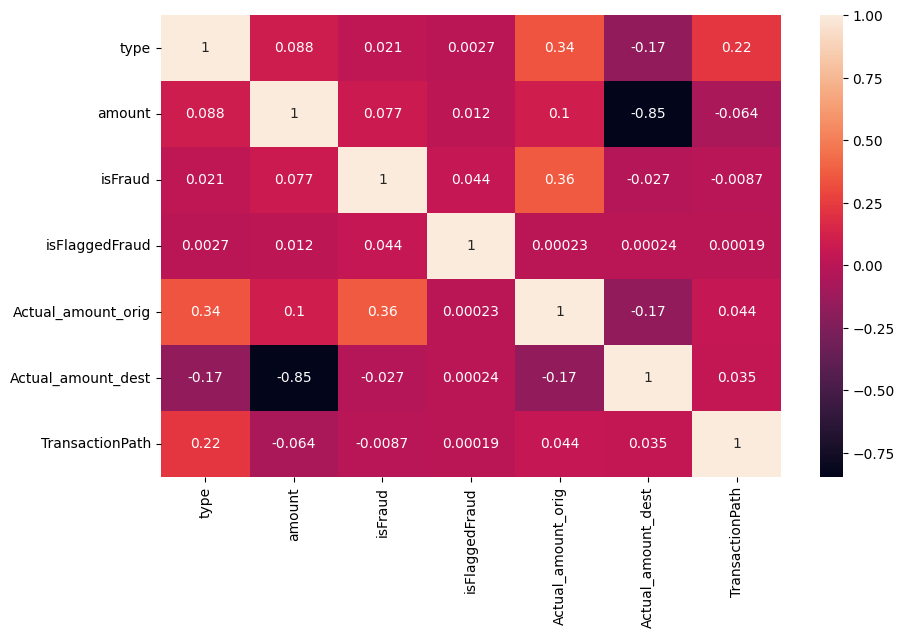

In [32]:
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)


How did you select variables to be included in the model?

Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

# **TARGET AND FEATURE SELCTION:**

# **NORMALIZING (SCALING) AMOUNT**

In [33]:
from sklearn.preprocessing import StandardScaler
# Perform Scaling
scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["amount"].values.reshape(-1, 1))
df.drop(["amount"], inplace= True, axis= 1)

In [34]:
x = df.drop(columns=['isFraud'])
y = df['isFraud']

In [35]:
y.value_counts() 

0    6354407
1       8213
Name: isFraud, dtype: int64

# **Random undersampling**

In [39]:
from imblearn.under_sampling import RandomUnderSampler #  import 
rus = RandomUnderSampler() #Intialise the model
X_rus, y_rus = rus.fit_resample(x, y) #resampling the data 

In [40]:
y_rus.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

LR = LogisticRegression()
LR.fit(X_rus,y_rus)
LR.score(X_rus,y_rus)

0.918848167539267

# **Random oversampling**

In [42]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler() #Initialis the model 
X_ros, y_ros = ros.fit_resample(x,y) #Fit the model

In [43]:
y_ros.value_counts() #resampled

0    6354407
1    6354407
Name: isFraud, dtype: int64

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

LR = LogisticRegression()
LR.fit(X_ros,y_ros)
LR.score(X_ros,y_ros)

0.9140883641856746

**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x,y)

In [ ]:
y_sm.value_counts() #resampled

0    6354407
1    6354407
Name: isFraud, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

LR = LogisticRegression()
LR.fit(X_sm,y_sm)
LR.score(X_sm,y_sm)

0.916087449230117

# **1.Logistic Regression**

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_rus,y_rus,test_size=0.30,random_state=0)

In [46]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred = log_reg.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[2347,   91],
       [ 282, 2208]])

In [49]:
accuracy_score(y_test, y_pred)

0.924310064935065

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      2438
           1       0.96      0.89      0.92      2490

    accuracy                           0.92      4928
   macro avg       0.93      0.92      0.92      4928
weighted avg       0.93      0.92      0.92      4928



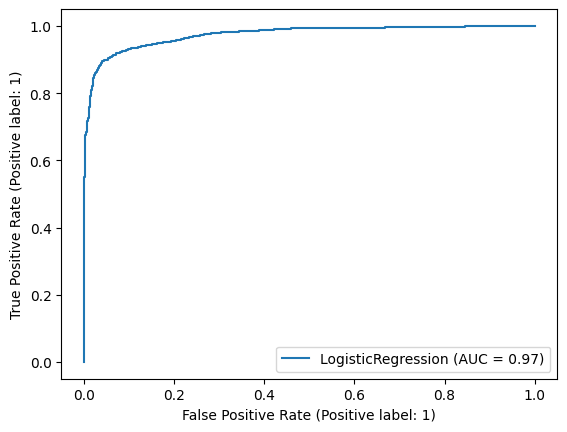

In [51]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(log_reg, x_test, y_test)

# **2.Decision Tree Classifier**

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [53]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train) 
print(dtc.score(x_train ,y_train)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dtc.predict_proba(x_test)[:, 1]))

1.0
AUROC on the sampled dataset :  0.9585821547057797


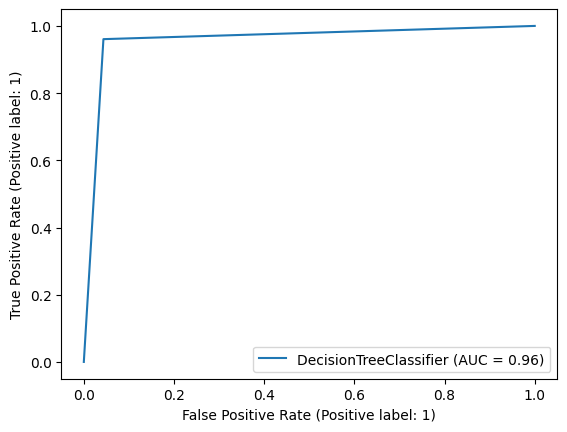

In [54]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(dtc, x_test, y_test)

In [62]:
Y_pred_dt = dtc.predict(x_test)
decision_tree_score = dtc.score(x_test, y_test) * 100

In [63]:
confusion_matrix_dt = confusion_matrix(y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[2332  106]
 [  98 2392]]


In [64]:
# classification report - DT

classification_report_dt = classification_report(y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2438
           1       0.96      0.96      0.96      2490

    accuracy                           0.96      4928
   macro avg       0.96      0.96      0.96      4928
weighted avg       0.96      0.96      0.96      4928



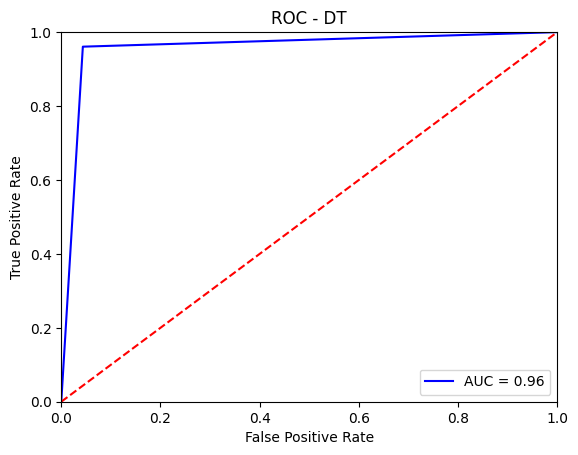

In [68]:
fpr, tpr, threshold = metrics.roc_curve(y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **3.Random Forest Classifier**

In [55]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy") 
classifier.fit(x_train, y_train) 
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 0, 1])

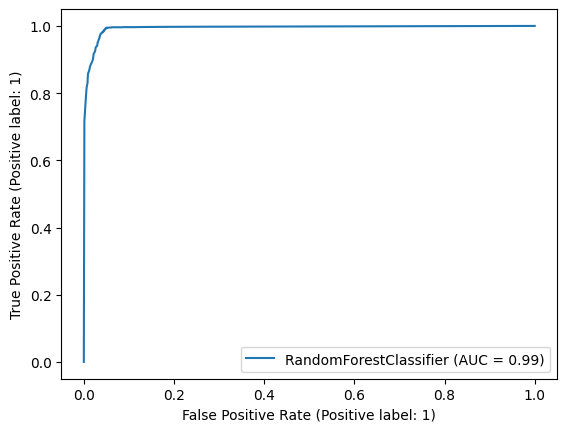

In [56]:
svc_disp = RocCurveDisplay.from_estimator(classifier, x_test, y_test) 

In [66]:
classification_report_rf = classification_report(y_test, y_pred)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2438
           1       0.96      0.98      0.97      2490

    accuracy                           0.97      4928
   macro avg       0.97      0.97      0.97      4928
weighted avg       0.97      0.97      0.97      4928



In [65]:
# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(y_test, y_pred.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[2336  102]
 [  45 2445]]


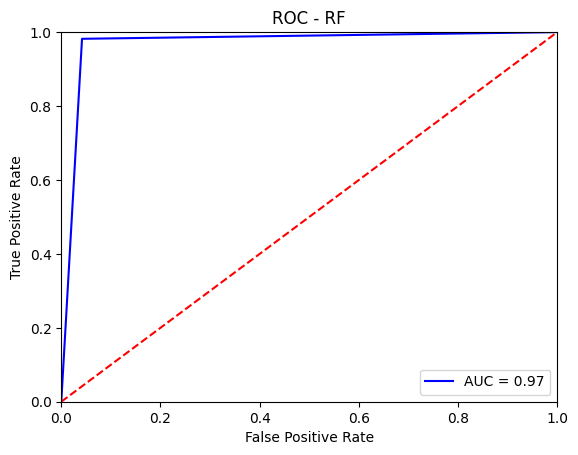

In [67]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **FEATURE IMPORTANCE OF ALL MODELS**

In [57]:
x.columns

Index(['type', 'isFlaggedFraud', 'Actual_amount_orig', 'Actual_amount_dest',
       'TransactionPath', 'NormalizedAmount'],
      dtype='object')

In [60]:
importance = dtc.feature_importances_
list(zip(importance,['type', 'isFlaggedFraud', 'Actual_amount_orig', 'Actual_amount_dest',
       'TransactionPath', 'NormalizedAmount']))

[(0.06936229267574819, 'type'),
 (0.0, 'isFlaggedFraud'),
 (0.7015420606896327, 'Actual_amount_orig'),
 (0.08458930699018602, 'Actual_amount_dest'),
 (0.03465635981458164, 'TransactionPath'),
 (0.10984997982985137, 'NormalizedAmount')]

In [61]:
importance = classifier.feature_importances_
list(zip(importance,['type', 'isFlaggedFraud', 'Actual_amount_orig', 'Actual_amount_dest',
       'TransactionPath', 'NormalizedAmount'
      ]))

[(0.1368776794421204, 'type'),
 (0.002543601780214204, 'isFlaggedFraud'),
 (0.4939809408548935, 'Actual_amount_orig'),
 (0.1656499548431647, 'Actual_amount_dest'),
 (0.03485142541221206, 'TransactionPath'),
 (0.166096397667395, 'NormalizedAmount')]

# **CONCLUSION**

We have seen that Accuracy of both Random Forest and Decision Tree is equal, although teh precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.
This is also one of the reason why Random Forest and Decision Tree are used unstead of other algorithms.


Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.


Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.

What are the key factors that predict fraudulent customer?

1.he source of request is secured or not ?

2.Is the name of organisation asking for money is legit or not ?

3.Transaction history of vendors.


What kind of prevention should be adopted while company update its infrastructure?

1.Use smart vertified apps only.

2.Browse through secured websites.

3.Use secured internet connections (USE VPN).

4.Keep your mobile and laptop security updated.

5.Don't respond to unsolicited calls/SMS(s/E-mails.

6.If you feel like you have been tricked or security compromised, contact your bank immidiately.




Assuming these actions have been implemented, how would you determine if they work?

1.Bank sending E-statements.

2.Customers keeping a check of their account activity.

3.Always keep a log of your payments.